In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('mr/sst5.csv', encoding='unicode_escape', header=0)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 11853, saw 3


In [4]:
df.head(5)

,sentiment,review
0,4,lovely film lovely performance buy accorsi
1,3,one go unindicted probably best
2,4,not nearly moved tear couple scene got ice wat...
3,5,warm funny engaging film
4,5,us sharp humor insight human nature examine cl...


In [5]:
df.head(5)

,sentiment,review
0,4,lovely film lovely performance buy accorsi
1,3,one go unindicted probably best
2,4,not nearly moved tear couple scene got ice wat...
3,5,warm funny engaging film
4,5,us sharp humor insight human nature examine cl...


In [108]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [109]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [110]:
import pandas as pd

In [275]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/sst5.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('mr/train-sst5.csv', index=False)
test.to_csv('mr/test-sst5.csv', index=False)

In [276]:
train_df = pd.read_csv("mr/train-sst5.csv", encoding='unicode_escape', header=0)

In [277]:
train_df

,sentiment,review
0,2,people want ol ballandchain want ball chain
1,4,washington strong hand keen eye sweet spirit g...
2,0,lazy filmmaking director taking handsoff appro...
3,3,mostly intelligent engrossing psychologically ...
4,4,substitute onscreen chemistry friel pull strin...
...,...,...
10660,1,question determine well schmaltz manufactured ...
10661,1,vampire thriller blade ii start wild hoot suck...
10662,3,strangely come kingdom mild wild
10663,2,blue lagoon


In [278]:
train_df.iloc[0][1]

'people want ol ballandchain want ball chain'

In [279]:
test_df = pd.read_csv("mr/test-sst5.csv", encoding='unicode_escape', header=0)

In [280]:
test_df.shape

(1185, 2)

In [281]:
test_df.head()

,sentiment,review
0,3,otherwise intense twistandturn thriller certai...
1,3,format get used best capture dizzying height a...
2,3,good film glum
3,2,sheer selfish woundlicking barscrapping dogged...
4,4,belongs daniel daylewis much belongs martin sc...


In [282]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)
train_df['review'] = (train_df['review']).astype(str)
test_df['review'] = (test_df['review']).astype(str)
train_df.head(30)

,sentiment,review
0,2,people want ol ballandchain want ball chain
1,4,washington strong hand keen eye sweet spirit g...
2,0,lazy filmmaking director taking handsoff appro...
3,3,mostly intelligent engrossing psychologically ...
4,4,substitute onscreen chemistry friel pull strin...
5,1,script le spice rat burger rock fighting skill...
6,1,film strictly routine
7,4,writing clever cast appealing
8,0,make say obvious abandon hope good movie ye enter
9,2,simply portrait early extreme sport peek skate...


In [283]:
test_df.head()

,sentiment,review
0,3,otherwise intense twistandturn thriller certai...
1,3,format get used best capture dizzying height a...
2,3,good film glum
3,2,sheer selfish woundlicking barscrapping dogged...
4,4,belongs daniel daylewis much belongs martin sc...


In [284]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...


In [285]:
train_df_bert

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...
...,...,...,...
10660,10660,1,question determine well schmaltz manufactured ...
10661,10661,1,vampire thriller blade ii start wild hoot suck...
10662,10662,3,strangely come kingdom mild wild
10663,10663,2,blue lagoon


In [286]:
train_df_bert = train_df_bert.iloc[0:10000]

In [287]:
train_df_bert

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...
...,...,...,...
9995,9995,4,compellingly watchable
9996,9996,1,action scene thing fall apart
9997,9997,2,holm terrific men hjejle quite appealing film ...
9998,9998,4,swimming young woman face casting actress whos...


In [288]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,3,otherwise intense twistandturn thriller certai...
1,1,3,format get used best capture dizzying height a...
2,2,3,good film glum
3,3,2,sheer selfish woundlicking barscrapping dogged...
4,4,4,belongs daniel daylewis much belongs martin sc...


In [289]:
test_df_bert = test_df_bert.iloc[0:3000]

In [290]:
test_df_bert

,id,label,sentence
0,0,3,otherwise intense twistandturn thriller certai...
1,1,3,format get used best capture dizzying height a...
2,2,3,good film glum
3,3,2,sheer selfish woundlicking barscrapping dogged...
4,4,4,belongs daniel daylewis much belongs martin sc...
...,...,...,...
1180,1180,0,awfully derivative story
1181,1181,4,work smoothly direction spielberg convincing i...
1182,1182,3,cho continues exploration outer limit raunch c...
1183,1183,1,everything serious poetic earnest sadly dull


In [291]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [292]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [293]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [294]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  washington strong hand keen eye sweet spirit good taste reflected almost every scene
Tokenized:  ['washington', 'strong', 'hand', 'keen', 'eye', 'sweet', 'spirit', 'good', 'taste', 'reflected', 'almost', 'every', 'scene']
Token IDs:  [2899, 2844, 2192, 10326, 3239, 4086, 4382, 2204, 5510, 7686, 2471, 2296, 3496]


In [295]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  42


In [296]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  41


In [297]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  people want ol ballandchain want ball chain
Token IDs: tensor([  101,  2111,  2215, 19330,  3608,  5685, 24925,  2078,  2215,  3608,
         4677,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [298]:

train_df_bert.head()

,id,label,sentence
0,0,2,people want ol ballandchain want ball chain
1,1,4,washington strong hand keen eye sweet spirit g...
2,2,0,lazy filmmaking director taking handsoff appro...
3,3,3,mostly intelligent engrossing psychologically ...
4,4,4,substitute onscreen chemistry friel pull strin...


In [299]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [300]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [301]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 50

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 50)
X_test shape: (1185, 50)


In [302]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [303]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [304]:
#FuzzyCNNLSTM
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
import torch.optim as optim

#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32
hidden_dims = 40

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 50, 32)            64000     
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 50, 32)            5152      
_________________________________________________________________
dropout_77 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 50, 32)            4128      
_________________________________________________________________
dropout_78 (Dropout)         (None, 50, 32)            0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 50, 32)            3104      
_________________________________________________________________
dropout_79 (Dropout)         (None, 50

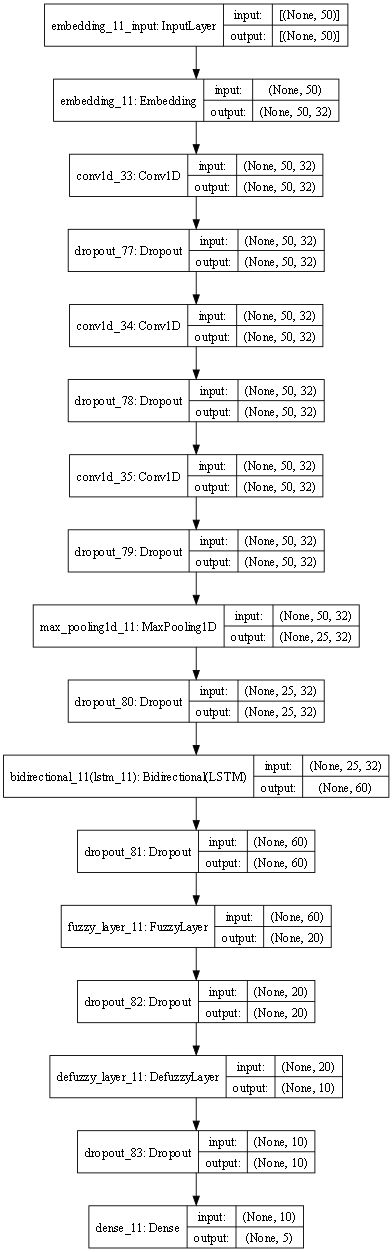

In [305]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [308]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 12s 13ms/step - loss: 1.2349 - accuracy: 0.4840 - val_loss: 1.2592 - val_accuracy: 0.4720
Epoch 2/20
900/900 [==============================] - 11s 12ms/step - loss: 1.1906 - accuracy: 0.5023 - val_loss: 1.2821 - val_accuracy: 0.4590
Epoch 3/20
900/900 [==============================] - 11s 12ms/step - loss: 1.1380 - accuracy: 0.5309 - val_loss: 1.3102 - val_accuracy: 0.4840
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0300 - accuracy: 0.5796
Training Accuracy: 0.579600
Training Loss: 1.029962
38/38 [==============================] - 0s 6ms/step - loss: 2.4074 - accuracy: 0.2515
Testing Accuracy:  0.251477
Testing Loss:  2.407433


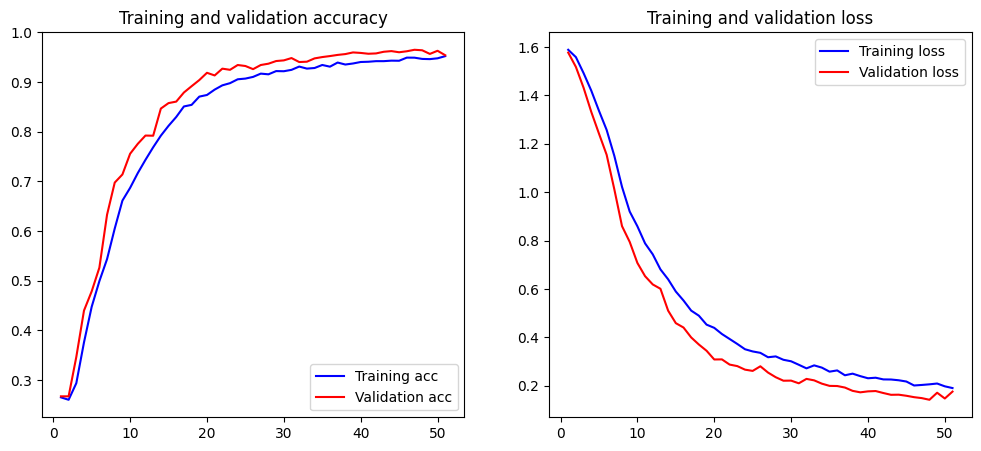

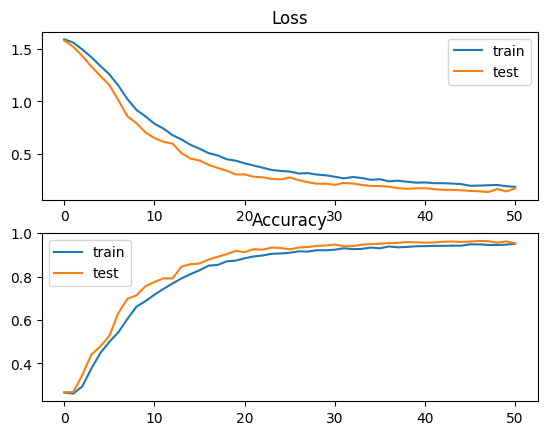

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

In [152]:
#NewCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 5000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 125
nb_classes = 3

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(FuzzyLayer(20, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=3))

#model.add(FuzzyLayer(10, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=1))

#model.add(FuzzyLayer(10, input_dim=2))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(FuzzyLayer(10, input_dim=2))

#model.add(Flatten())
#model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(DefuzzyLayer(1))

#model.add(Dense(nb_classes))
#model.add(Activation('softmax'))
#model.add(Dense(1, activation='sigmoid'))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            160000    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60)                15120     
_________________________________________________________________
dense_10 (Dense)             (None, 1)

In [149]:
# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/50
1000/1000 [==============================] - 16s 13ms/step - loss: 0.3485 - accuracy: 0.8528 - val_loss: 0.2182 - val_accuracy: 0.9203
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1685 - accuracy: 0.9306 - val_loss: 0.1174 - val_accuracy: 0.9537
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1220 - accuracy: 0.9467 - val_loss: 0.0877 - val_accuracy: 0.9590
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0891 - accuracy: 0.9591 - val_loss: 0.0747 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0699 - accuracy: 0.9636 - val_loss: 0.0562 - val_accuracy: 0.9683
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0682 - accuracy: 0.9638 - val_loss: 0.0522 - val_accuracy: 0.9713
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0584 - accuracy: 0.9657 - val_loss: 0.0529 -

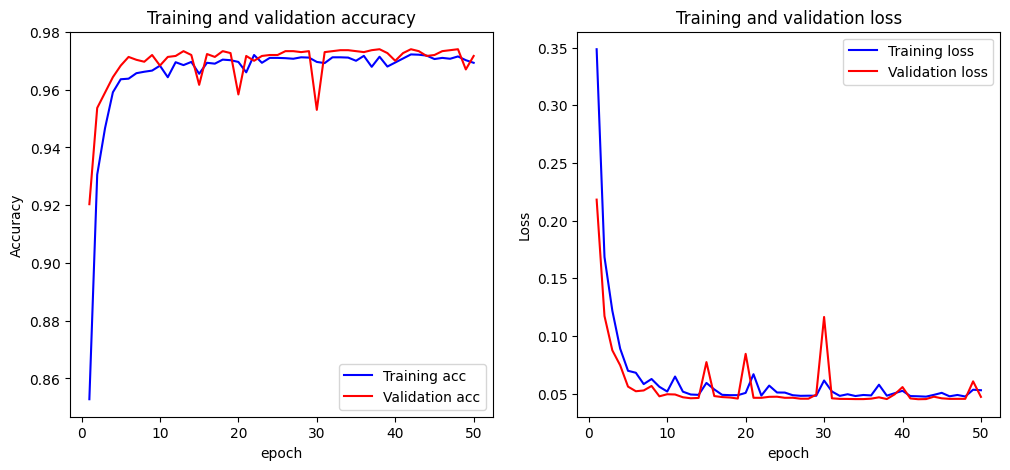

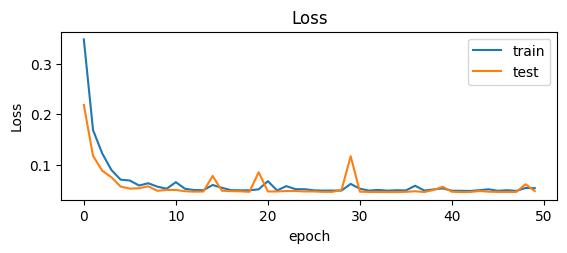

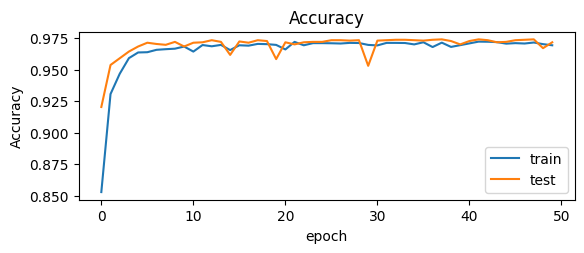

In [150]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [177]:
# 3 - CNNLSTM model design
print('Building model')

embedding_vector_length = 32

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
#model.add(FuzzyLayer(5, input_dim=2))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Building model


ValueError: Input 0 of layer conv1d_67 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 125)

In [77]:
history1 = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/20
1000/1000 [==============================] - 9s 7ms/step - loss: 0.3485 - accuracy: 0.8524 - val_loss: 0.1909 - val_accuracy: 0.9187
Epoch 2/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1571 - accuracy: 0.9321 - val_loss: 0.1119 - val_accuracy: 0.9503
Epoch 3/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0945 - accuracy: 0.9574 - val_loss: 0.0744 - val_accuracy: 0.9627
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0833 - accuracy: 0.9585 - val_loss: 0.0713 - val_accuracy: 0.9633
Epoch 5/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0700 - accuracy: 0.9617 - val_loss: 0.0696 - val_accuracy: 0.9660
Epoch 6/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0678 - accuracy: 0.9654 - val_loss: 0.0538 - val_accuracy: 0.9707
Epoch 7/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0743 - accuracy: 0.9608 - val_loss: 0.0663 - val_accuracy:

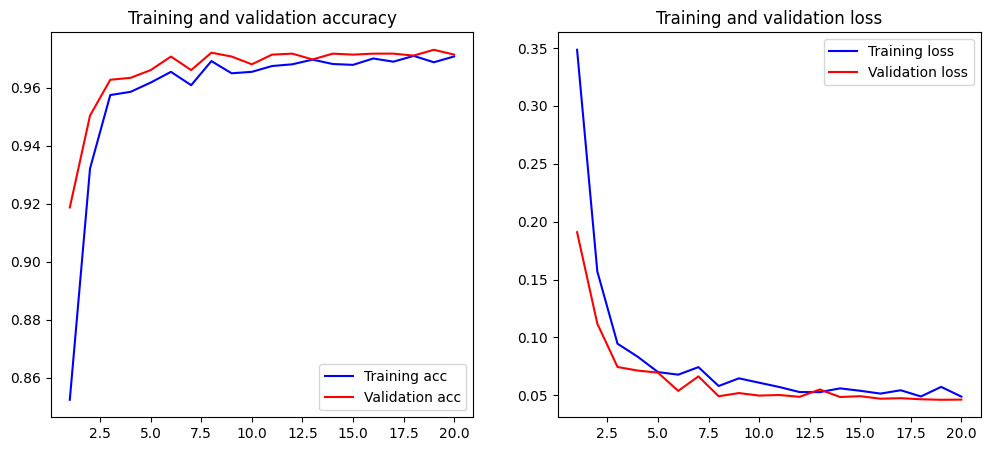

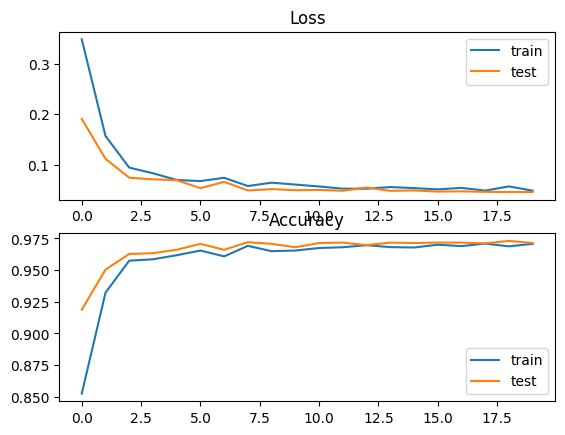

In [78]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [227]:
# number of neurons as number of Rule will be produce
n_neurons = 100

# number of features feed to fuzzy Inference Layer
n_feature = 9
from itertools import product
from keras import backend as K
import random
# to get all permutaion
fRules = list(product([-1.0,0.0,1.0], repeat=n_feature)) 

# based on article just 100 of them are needed
out_fRules = random.sample(fRules, n_neurons)

fRules_sigma = K.transpose(out_fRules)

In [228]:
import tensorflow as tf
class fuzzy_inference_block(tf.keras.layers.Layer):
    def __init__(self, output_dim, i_fmap, mu, sigma):

        self.output_dim = output_dim
        self.index = i_fmap
        self.mu = mu
        self.sigma = sigma

        super(fuzzy_inference_block, self).__init__()

    def build(self, input_shape):
        self.mu_map = fRules_sigma * self.mu
        self.sigma_map = tf.ones((n_feature, self.output_dim)) * self.sigma
        

        super().build(input_shape)

    def call(self, inputs):
        fMap = inputs[:,n_feature*(self.index):n_feature*(self.index+1)]
        # create variables for processing
        aligned_x = K.repeat_elements(K.expand_dims(fMap, axis=-1), self.output_dim, -1)
        aligned_c = self.mu_map
        aligned_s = self.sigma_map


        # calculate output of each neuron (fuzzy rule)
        phi = K.exp(-K.sum(K.square(aligned_x - aligned_c) / (2 * K.square(aligned_s)),
                           axis=-2, keepdims=False))
        return phi


In [239]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)


fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(fMaps)
fuzzy_inference = []
for i in tqdm(range(n_femap)):
    f_block = fuzzy_inference_block(output_dim=n_neurons, i_fmap=i, mu=mu, sigma=sigma)(drop_out)
    fuzzy_inference.append(f_block)
merged = concatenate(fuzzy_inference, axis=1)

dc=Dense(1,activation='sigmoid')(merged)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 72.50it/s]

Bi-LSTM NetWork
Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_46 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_95 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 embedding_96 (Embedding)       (None, 60, 32)       160000      ['input_46[0][0]']               
                                                                                                  
 dropout_125 (Dropout)          (None, 60, 32)       0           ['embedding_95[0][0]']           
                                                                           

In [240]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 9s 19ms/step - loss: 0.0000e+00 - accuracy: 0.6497 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.0000e+00 - accuracy: 0.6507 - val_loss: 0.0000e+00 - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.0000e+00 - accura

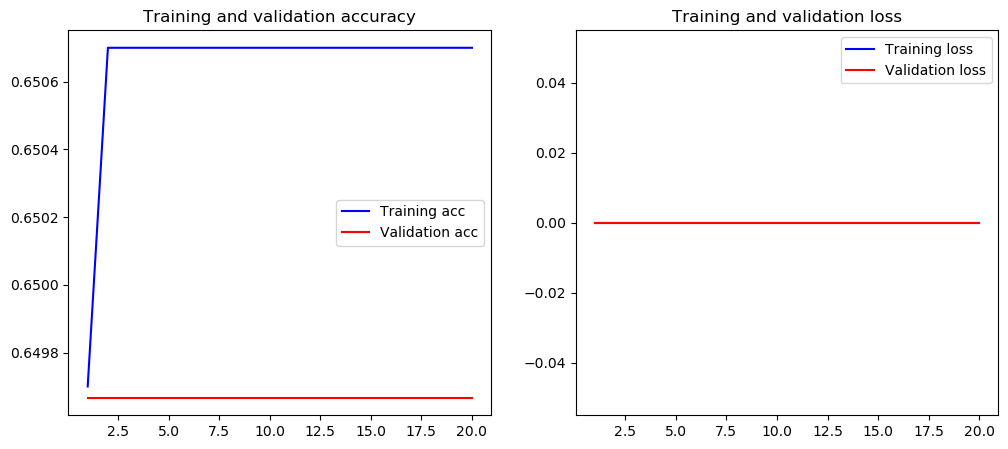

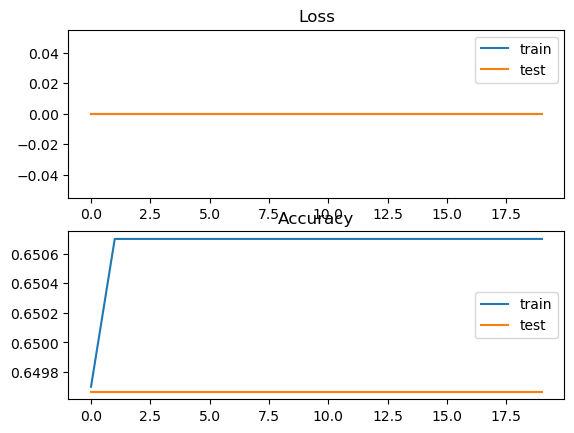

In [242]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [253]:
#Bi-LSTM Network
from tqdm import tqdm
from keras.layers import *
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

#model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
n_femap=4
stride=2
mu=3.0
sigma=1.2
embedding_vector_length = 32
max_features = 5000
main_input=Input(shape=(60,))
non_static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(max_features, embedding_vector_length, input_length=max_len_train, trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_vector_length,activation='tanh',
                             recurrent_activation='relu',
                             return_state=False,
                             return_sequences=False))(two_channel)

#fMaps = Flatten()(bi_lstm)
drop_out=Dropout(0.3)(bi_lstm)

dc=Dense(1,activation='sigmoid')(drop_out)

model=Model(inputs=main_input,outputs=dc)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
#sparse_categorical_crossentropy,

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)

Bi-LSTM NetWork
Model: "model_43"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_53 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 embedding_108 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 embedding_109 (Embedding)      (None, 60, 32)       160000      ['input_53[0][0]']               
                                                                                                  
 dropout_143 (Dropout)          (None, 60, 32)       0           ['embedding_108[0][0]']          
                                                                           

In [254]:
#Excute Bi-LSTM Model
epoch_cnt=20

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
313/313 [==============================] - 8s 18ms/step - loss: nan - accuracy: 0.6508 - val_loss: nan - val_accuracy: 0.6497
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: nan - accuracy: 0.6507 - val_loss: nan - val_accuracy: 0.6497
Epoch 8/20
313/313 [=====================

In [ ]:
from utils import *
import numpy as np
import random as rn
import tensorflow as tf
np.random.seed(42)
rn.seed(554521)
tf.set_random_seed(14452)
from keras.models import Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Activation, Input, Average
from keras.models import load_model
from sklearn.metrics import classification_report
import matplotlib as plt

RUN_ENSAMBLE = True
MODEL_SAVE_FOLDER = "models"

def model_1():
    model = Sequential(name="MODEL1")
    model.add(Dense(18, activation = 'sigmoid', input_shape=(28,)))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['mae','acc'])
    return model

def model_2(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(27, activation = 'relu')(input)
    #x = Dense(7, activation = 'sigmoid')(x)
    x = Dropout(0.1)(x)
    output = Dense(output, activation = 'softmax')(x)
    model = Model(inputs=input, outputs=output, name="MODEL2")

    return model

def model_3(input:int, output: int):
    input = Input(shape=(input,))
    x = Dense(35, activation = 'tanh')(input)
    #x = Dense(10, activation = 'tanh')(x)
    x = Dropout(0.2)(x)
    output = Dense(output, activation = 'softmax')(x)

    model = Model(inputs=input, outputs=output, name="MODEL3")

    return model


def ensamble_model(input: int):
    models = get_models(MODEL_SAVE_FOLDER) 
    models = load_models(models)
    input = Input(shape=(input,))
    eModels =[model(input) for model in models] 
    averageLayer = Average()(eModels)   
    ensModel = Model (name="EnsambleModel", inputs=input, outputs=averageLayer) 

    return ensModel

if __name__ == "__main__":
    trainX,x_test, trainY, y_test = prepare_data('dwt.csv')
    output = len(np.unique(y_test))
    cv_trainX, cv_trainY = get_data_without_encoding('dwt.csv')
    # model_1 = model_1(trainX.shape[1], output)
    train_with_cross_validation(model_1,trainX, trainY,epochs=2)
    import pdb; pdb.set_trace()
    # model_1 = fit_model(model_1, trainX,trainY,epochs=2, k_fold=3)
    
    # model_2 = model_2(trainX.shape[1], output)
    # model_2 = fit_model(model_2, trainX,trainY, epochs=2,k_fold=3)
   
    # model_3 = model_3(trainX.shape[1], output)
    # model_3 = fit_model(model_3, trainX,trainY, epochs=2, k_fold=3)
   
    # print(evalute_model(model_1,trainX, trainY,RUN_ENSAMBLE))
    # print(evalute_model(model_1, x_test, y_test, RUN_ENSAMBLE))
    # T=model_1.predict(x_test)
    # pred = np.argmax(T, axis=1)
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_2, x_test, y_test, RUN_ENSAMBLE))
    # # print(evalute_model(model_2,trainX, trainY,RUN_ENSAMBLE))
    # T=model_2.predict(x_test)
    # pred = np.argmax(T, axis=1)
   
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))

    # print(evalute_model(model_3, x_test, y_test, RUN_ENSAMBLE))
    # print(evalute_model(model_3,trainX, trainY,RUN_ENSAMBLE))
    # T=model_3.predict(x_test)
    # pred = np.argmax(T, axis=1)
    
    # Y_test = np.argmax(y_test, axis=1)
    # cm =  confusion_matrix(Y_test, pred)
    # np.set_printoptions(precision=2)
    # print ("Confusion Matrix",cm)
    # print(classification_report(Y_test, pred))
    

    save_model(model_1, path=MODEL_SAVE_FOLDER, filename=model_1.name)
    # # save_model(model_2, path=MODEL_SAVE_FOLDER, filename=model_2.name)
    # # save_model(model_3, path=MODEL_SAVE_FOLDER, filename=model_3.name)
    
    # RUN_ENSAMBLE = True
    # if(RUN_ENSAMBLE ==True):
    #     print("Running ensamble model")
    #     ensamble = ensamble_model(trainX.shape[1])
    #     ensamble.summary()
    #     print(evalute_model(ensamble, x_test, y_test, RUN_ENSAMBLE))
    #     pred=ensamble.predict(x_test)
    #     pred = np.argmax(pred, axis=1)
    #     Y_test = np.argmax(y_test, axis=1)
    #     cm =  confusion_matrix(Y_test, pred)
    #     np.set_printoptions(precision=2)
    #     print ("Confusion Matrix")
    #     print (cm)
    #     print(classification_report(Y_test, pred))